### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

>$G_t=R_{t+1}+R_{t+2}+...$<br>
如果$R_{t+2}=R_{t+1}$(这里同时指状态相同，而不单单是reward相等)，则会陷入循环，导致G会无限大，加入$\gamma\in (0,1)$能避免G无穷大的问题

2. Please breifly explain what is value function and what is Q function ?

>Value Function
>>$V_\pi(S)=\mathbb{E}_\pi(G_t|S_t=s)$，其中$\pi=policy$<br>
Value function是指在State=s时的value期望。因为State=s时可能有不止一种action，因此需要求期望值(而且time=t+1,t+2...可能都有不同的action，因此都需要求期望)

>Q Function
>>$Q_\pi(s,a)=\mathbb{E}_\pi(G_t|S_t=s,A_t=a)$<br>
Q function是指在State=s并采取Action=a时的value期望。

3. How temperal difference related to dynamic programming and monte-carlo methods ?

>Temperal difference是DP和MC的结合。DP需要知道环境变量，而MC需要每次走到end之后才能更新估计值。TD则是先用MC走N步，然后和DP一样用其他估计值来更新估计值。<br>
$V(S_t)\leftarrow V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1})-V(S))\;\;|\;\;NStep=1$

4. Please briefly describe what are value iteration and policy iteration ?

>这是在Dynamic programming中对value和policy更新的过程
>>Value iteration<br>
先初始化所有value(t=0)，然后一直迭代更新直到$|W_{t+1}-W_t|\le \theta$

>>Policy iteration分2步循环：
1. Policy evaluation: (t=0时，随机选择Action)，迭代计算得到value
2. 根据当前value求出最优的action，并更新
3. 如果$|\pi_{t+1}-\pi_t|\le \theta$，退出循环，反之则回到步骤1

5. How can we use deep lerning in reinforcement learning ?

>深度学习应用在强化学习中的方式是直接将state->action迭代的过程用神经网络来代替。设计一个函数$Q(s,a;\theta)$，通过不断更新$\theta$的值来使函数逼近最优的Q值

### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [2]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

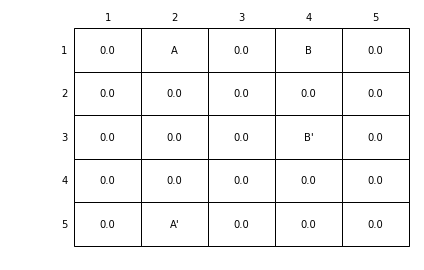

In [3]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [10]:
table = np.zeros((WORLD_SIZE, WORLD_SIZE))

In [11]:
table

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

迭代公式：<br>
$V^\pi(s)=\sum_{a}\pi(s,a)\sum_{s'}\mathcal{P}^{a}_{ss'}[\mathcal{R}^{a}_{ss'}+\gamma V^{\pi}(s')]$

In [48]:
def calc_v(i, j, v_table, gamma=0.9):
    if (i, j) == (0, 1):
        up_r = down_r = left_r = right_r = 10
        up_v = down_v = left_v = right_v = v_table[4][1]
    elif (i, j) == (0, 3):
        up_r = down_r = left_r = right_r = 5
        up_v = down_v = left_v = right_v = v_table[2][3]
    else:
        if j - 1 < 0:
            up_r, up_v = -1, v_table[i][j]
        else:
            up_r, up_v = 0, v_table[i][j-1]
        if j + 1 > 4:
            down_r, down_v = -1, v_table[i][j]
        else:
            down_r, down_v = 0, v_table[i][j+1]
        if i - 1 < 0:
            left_r, left_v = -1, v_table[i][j]
        else:
            left_r, left_v = 0, v_table[i-1][j]
        if i + 1 > 4:
            right_r, right_v = -1, v_table[i][j]
        else:
            right_r, right_v = 0, v_table[i+1][j]
    return 0.25*((up_r+gamma*up_v)+(down_r+gamma*down_v)+(left_r+gamma*left_v)+(right_r+gamma*right_v))

In [53]:
def iter_v(theta=1e-2):
    table = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        new_table = np.zeros((WORLD_SIZE, WORLD_SIZE))
        for (i,j), _ in np.ndenumerate(table):
            v = calc_v(i, j, table)
            new_table[i][j] = v
        if np.average(np.abs(table-new_table)) < theta:
            return new_table
        table = new_table

In [57]:
def draw_table(table):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = table.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(table):
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(table)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

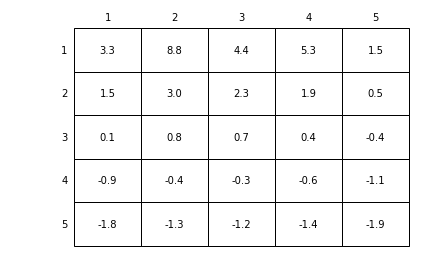

In [58]:
draw_table(np.around(iter_v(), decimals=1))